In [17]:
#import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

In [18]:
df = data = pd.read_csv("data/clean-data.csv")
data.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [24]:
#Split the data into training and test set
train, test = train_test_split(df, random_state=42)
X_train = train[train.columns[2:-1]]
y_train = train['diagnosis']
X_test = test[test.columns[2:-1]] 
y_test = test['diagnosis']













In [9]:
#On buildinga simple Linear SVC model and test it
#SVC Models are good when the data is scaled. Lets scale the data and build the model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC(random_state=0).fit(X_train_scaled,y_train)
print("train score - " + str(svc_model.score(X_train_scaled, y_train)))
print("test score - " + str(svc_model.score(X_test_scaled, y_test)))

train score - 0.948356807512
test score - 0.958041958042


In [10]:
#Printing the default parameter score
print(svc_model)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


In [11]:
#We can use a grid search to find the best parameters for this model. Lets try

#Define a list of parameters for the model
params = {'C': [0dels.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#Building Grid Search model using the above parameters. 
#cv=5 means cross validation with 5 folds
grid_search = GridSearchCV(SVC(random_state=0), params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("train score - " + str(grid_search.score(X_train_scaled, y_train)))
print("test score - " + str(grid_search.score(X_test_scaled, y_test)))

train score - 0.978873239437
test score - 0.986013986014


In [12]:
#On checking the best parameters the model used.
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1}


In [14]:
#We can visualize the parameter dependency with the models
results_df = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results_df.mean_test_score).reshape(6, 6)


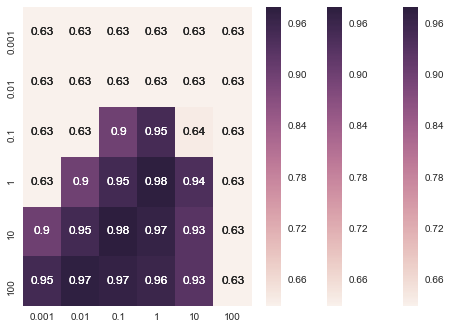

In [21]:
sns.heatmap(scores, annot=True, 
            xticklabels=params['gamma'], yticklabels=params['C'])
plt.show()